# Notebook Dedicated to Compare the Reconstructed Energy with the Callibrated energy for multiple radial positions

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib.lines import Line2D
import seaborn as sn
import glob

# Load the Data

In [2]:
# MC Main Data Directory
mc_main_dir = 'E:/Data/solars/mc/bisMSB/'

# Observables List to load
obs_list_mc = ['energy', 'energy_corrected', 'posr_av']

## Solar 8B-$\nu_e$

### Unoscillated

In [3]:
fdir = mc_main_dir + 'b8Nue/non_osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_nue = solar_dic['energy']
energy_corr_b8_nue = solar_dic['energy_corrected']
posr_b8_nue = solar_dic['posr_av']

In [4]:
energy_b8_nue.shape

(6578425,)

### Oscillated

In [5]:
fdir = mc_main_dir + 'b8Nue/osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_osc_nue = solar_dic['energy']
energy_corr_b8_osc_nue = solar_dic['energy_corrected']
posr_b8_osc_nue = solar_dic['posr_av']

In [6]:
energy_b8_osc_nue.shape

(2321345,)

## Solar 8B-$\nu_\mu$

### Unoscillated

In [7]:
fdir = mc_main_dir + 'b8Numu/non_osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_numu = solar_dic['energy']
energy_corr_b8_numu = solar_dic['energy_corrected']
posr_b8_numu = solar_dic['posr_av']

In [8]:
energy_b8_numu.shape

(4432731,)

### Oscillated

In [9]:
fdir = mc_main_dir + 'b8Numu/osc/np_array_resume/'

solar_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    solar_dic[obs_i] = np.append(solar_dic[obs_i], obs)

energy_b8_osc_numu = solar_dic['energy']
energy_corr_b8_osc_numu = solar_dic['energy_corrected']
posr_b8_osc_numu = solar_dic['posr_av']

In [10]:
energy_b8_osc_numu.shape

(2891231,)

## Thallium-208

In [11]:
fdir = mc_main_dir + 'tl208/np_array_resume/'

tl208_dic = {var: np.array([]) for var in obs_list_mc}

# Loop over the observables to load
for obs_i in obs_list_mc:
    obs = np.load(fdir + obs_i + '.npy')
    tl208_dic[obs_i] = np.append(tl208_dic[obs_i], obs)

energy_tl208 = tl208_dic['energy']
energy_corr_tl208 = tl208_dic['energy_corrected']
posr_tl208 = tl208_dic['posr_av']

In [12]:
max(energy_tl208)

5.7122281338204655

# Plots for Various Radial Cuts

In [17]:
r_cut = [5700, 5500, 5000, 4500]  # Radial cut list to test
r_cut_colors = ['#fc0303', '#0313fc', '#b204b8', '#2eb804']

## Plots of Solar MC

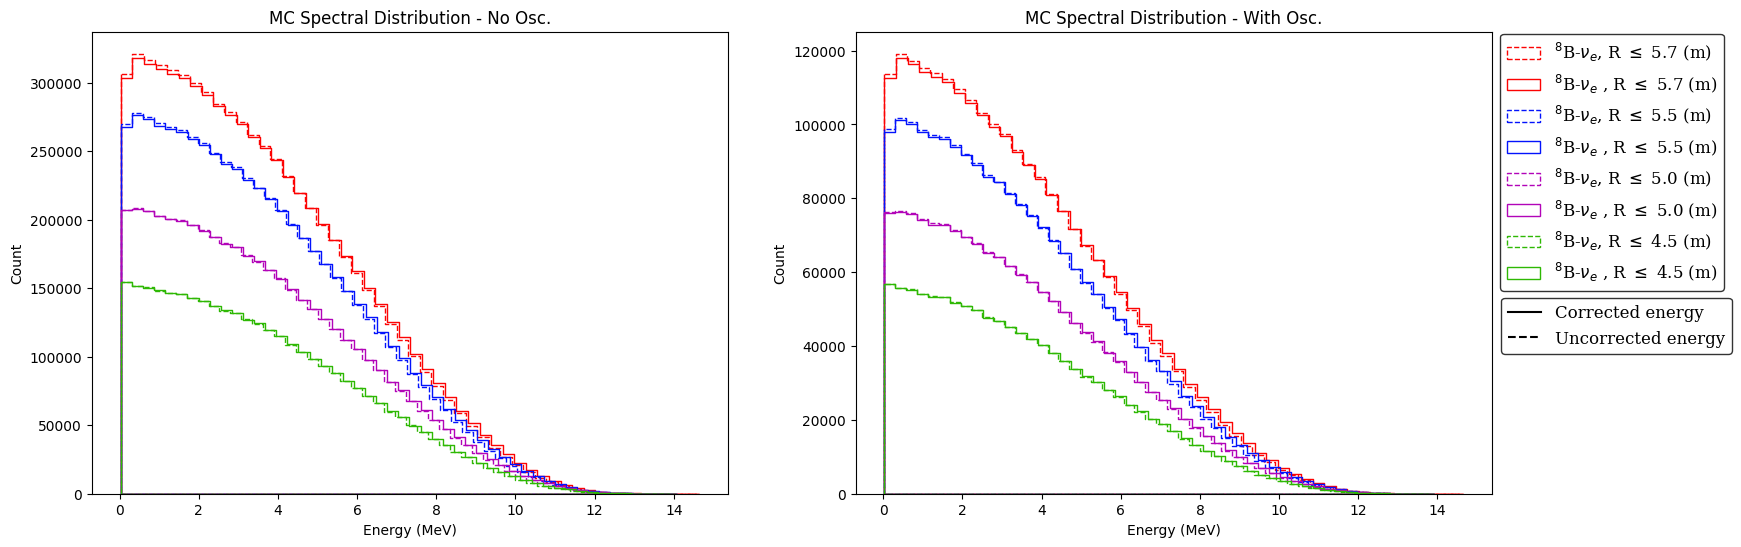

In [41]:
# ====== Plot Settings ======

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':13}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=font_style_axis['size'])

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply cuts on the dataset ====

    # ---- Construct the masks ----
    mask_cut_b8_nue = (posr_b8_nue <= r_cut_i)
    mask_cut_b8_osc_nue = (posr_b8_osc_nue <= r_cut_i)
    
    # ---- Select the Data ----
    energy_b8_nue_cut = energy_b8_nue[mask_cut_b8_nue]
    energy_corr_b8_nue_cut = energy_corr_b8_nue[mask_cut_b8_nue]
    
    energy_b8_osc_nue_cut = energy_b8_osc_nue[mask_cut_b8_osc_nue]
    energy_corr_b8_osc_nue_cut = energy_corr_b8_osc_nue[mask_cut_b8_osc_nue]

    # ======== PLOTS ========

    # Left plot -> without nu osc
    sn.histplot(energy_b8_nue_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_e$, R $\leq$ {r_cut_i*10**(-3)} (m)')   
    sn.histplot(energy_corr_b8_nue_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_e$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
 

    #axes[0].set_yscale('log')
    #axes[0].set_xlim(5, )
    axes[0].set_xlabel('Energy (MeV)')
    #axes[0].legend(loc = 'best')
    axes[0].set_title('MC Spectral Distribution - No Osc.')

        
    # Right plot -> with nu osc
    sn.histplot(energy_b8_osc_nue_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_e$, R $\leq$ {r_cut_i*10**(-3)} (m)')

    sn.histplot(energy_corr_b8_osc_nue_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_e$ , R $\leq$ {r_cut_i*10**(-3)} (m)')


    #axes[1].set_yscale('log')
    #axes[1].set_xlim(5, )
    axes[1].set_xlabel('Energy (MeV)')
    #axes[1].legend(loc = 'best')
    axes[1].set_title('MC Spectral Distribution - With Osc.')

#Common legends :
# Obtain the handles and labels of only one plot (just because they share labels!)
handles, labels = axes[0].get_legend_handles_labels()

# Create one legend out of the axis plots
fig.legend(handles, labels,
           loc = 'upper right',        
           bbox_to_anchor = (1.15, 0.89),  # coordinates of the box at the right (x, y)
           frameon = True,                 # white background
           edgecolor='black',
           prop = font_prop,
           labelcolor = font_style_axis['color'])

# Adjunts the plot size to left space to the legend box 
fig.subplots_adjust(right = 1)  # right space

# ---- Legend for line styles ----
line_style_handles = [Line2D([0], [0], color='black', linestyle='-',
           label='Corrected energy'),
           Line2D([0], [0], color='black', linestyle='--',
           label='Uncorrected energy')]

fig.legend(handles=line_style_handles,
           loc='upper right',
           bbox_to_anchor=(1.155, 0.45),
           frameon=True,
           edgecolor='black',
           prop=font_prop)

plt.show()

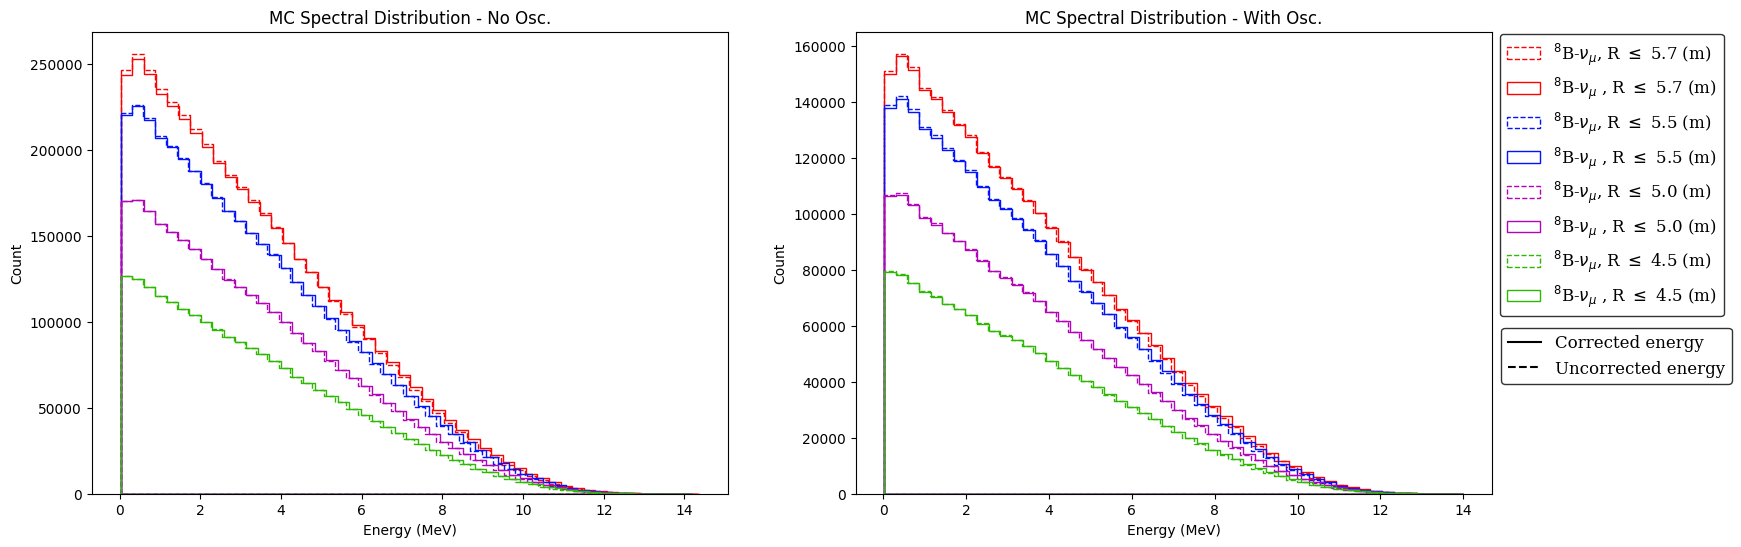

In [42]:
# ====== Plot Settings ======

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':13}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=font_style_axis['size'])

bins = 50

for i_dx, r_cut_i in enumerate(r_cut):

    # ==== Apply cuts on the dataset ====

    # ---- Construct the masks ----
    mask_cut_b8_numu = (posr_b8_numu <= r_cut_i)
    mask_cut_b8_osc_numu = (posr_b8_osc_numu <= r_cut_i)
    
    # ---- Select the Data ----
    energy_b8_numu_cut = energy_b8_numu[mask_cut_b8_numu]
    energy_corr_b8_numu_cut = energy_corr_b8_numu[mask_cut_b8_numu]
    
    energy_b8_osc_numu_cut = energy_b8_osc_numu[mask_cut_b8_osc_numu]
    energy_corr_b8_osc_numu_cut = energy_corr_b8_osc_numu[mask_cut_b8_osc_numu]

    # ======== PLOTS ========

    # Left plot -> without nu osc
    sn.histplot(energy_b8_numu_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_\mu$, R $\leq$ {r_cut_i*10**(-3)} (m)')   
    sn.histplot(energy_corr_b8_numu_cut, ax = axes[0], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_\mu$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
 

    #axes[0].set_yscale('log')
    #axes[0].set_xlim(5, )
    axes[0].set_xlabel('Energy (MeV)')
    #axes[0].legend(loc = 'best')
    axes[0].set_title('MC Spectral Distribution - No Osc.')

        
    # Right plot -> with nu osc
    sn.histplot(energy_b8_osc_numu_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step', 
                linestyle = "--", label = rf'$^8$B-$\nu_\mu$, R $\leq$ {r_cut_i*10**(-3)} (m)')

    sn.histplot(energy_corr_b8_osc_numu_cut, ax = axes[1], bins = bins, color = r_cut_colors[i_dx], alpha = 0, element = 'step',
                label = rf'$^8$B-$\nu_\mu$ , R $\leq$ {r_cut_i*10**(-3)} (m)')


    #axes[1].set_yscale('log')
    #axes[1].set_xlim(5, )
    axes[1].set_xlabel('Energy (MeV)')
    #axes[1].legend(loc = 'best')
    axes[1].set_title('MC Spectral Distribution - With Osc.')

#Common legends :
# Obtain the handles and labels of only one plot (just because they share labels!)
handles, labels = axes[0].get_legend_handles_labels()

# Create one legend out of the axis plots
fig.legend(handles, labels,
           loc = 'upper right',        
           bbox_to_anchor = (1.15, 0.89),  # coordinates of the box at the right (x, y)
           frameon = True,                 # white background
           edgecolor='black',
           prop = font_prop,
           labelcolor = font_style_axis['color'])

# Adjunts the plot size to left space to the legend box 
fig.subplots_adjust(right = 1)  # right space

# ---- Legend for line styles ----
line_style_handles = [Line2D([0], [0], color='black', linestyle='-',
           label='Corrected energy'),
           Line2D([0], [0], color='black', linestyle='--',
           label='Uncorrected energy')]

fig.legend(handles=line_style_handles,
           loc='upper right',
           bbox_to_anchor=(1.155, 0.40),
           frameon=True,
           edgecolor='black',
           prop=font_prop)

plt.show()

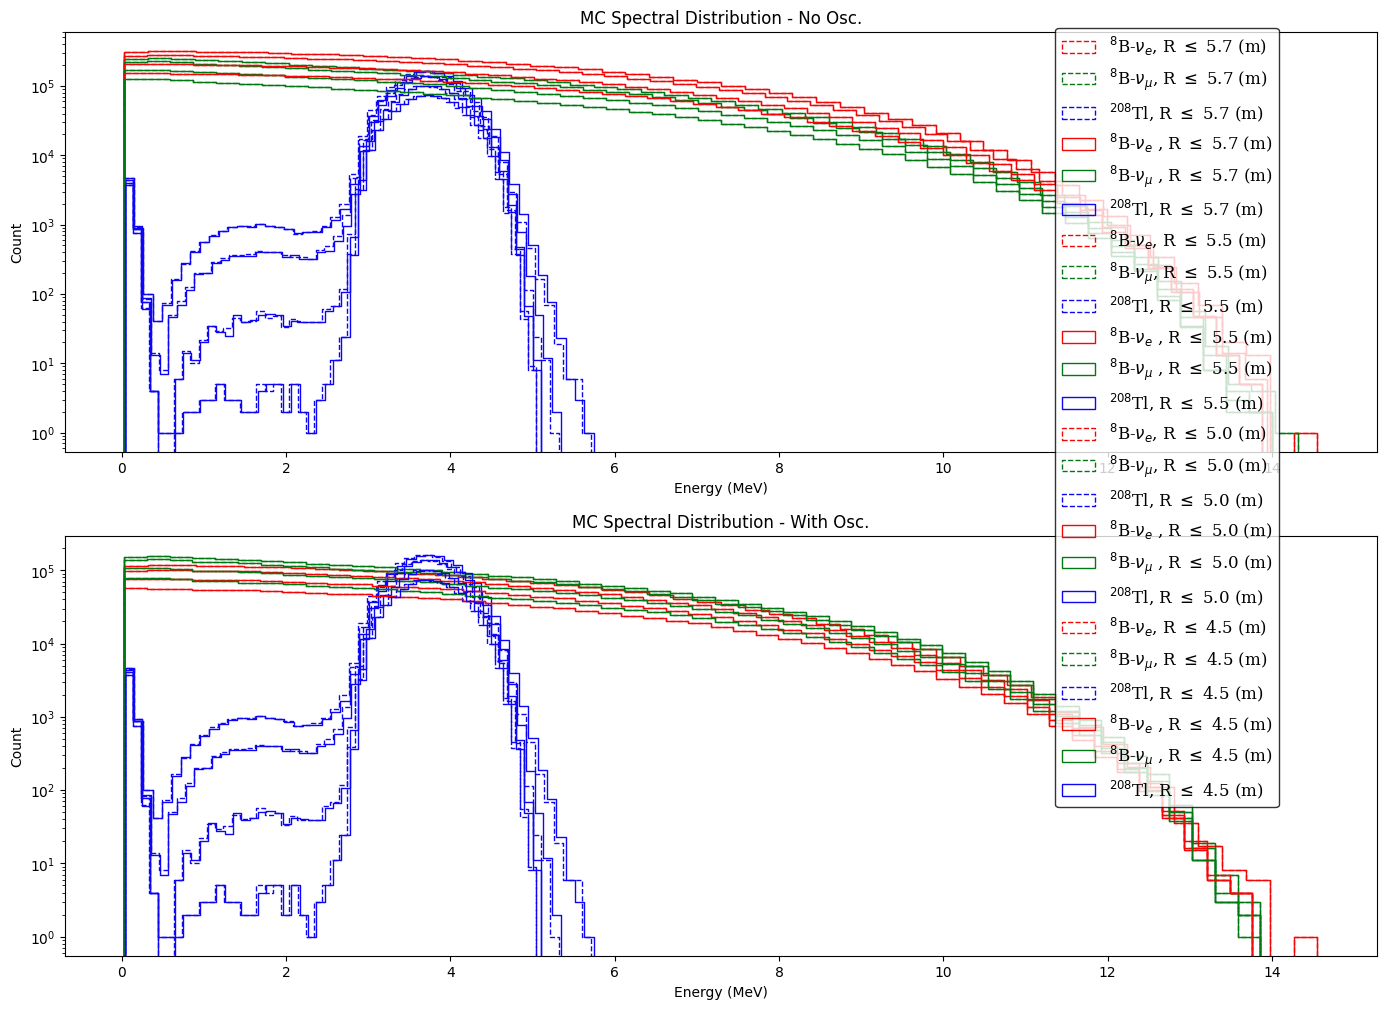

In [50]:
# ====== Plot Settings ======

fig, axes = plt.subplots(1, 2, figsize=(15, 12))

font_style_title = {'family':'serif', 'weight': 'normal','color':'black','size':13}
font_style_axis= {'family':'serif', 'weight': 'normal','color':'black','size':12}
font_prop = font_manager.FontProperties(family=font_style_axis['family'], weight=font_style_axis['weight'], size=font_style_axis['size'])

bins = 50

for r_cut_i in r_cut:

    # ==== Apply cuts on the dataset ====

    # ---- Construct the masks ----
    mask_cut_b8_nue = (posr_b8_nue <= r_cut_i)
    mask_cut_b8_osc_nue = (posr_b8_osc_nue <= r_cut_i)
    
    mask_cut_b8_numu = (posr_b8_numu <= r_cut_i)
    mask_cut_b8_osc_numu = (posr_b8_osc_numu <= r_cut_i)

    mask_cut_tl208 = (posr_tl208 <= r_cut_i)

    # ---- Select the Data ----
    energy_b8_nue_cut = energy_b8_nue[mask_cut_b8_nue]
    energy_corr_b8_nue_cut = energy_b8_nue[mask_cut_b8_nue]
    energy_b8_osc_nue_cut = energy_b8_osc_nue[mask_cut_b8_osc_nue]
    energy_corr_b8_osc_nue_cut = energy_b8_osc_nue[mask_cut_b8_osc_nue]

    energy_b8_numu_cut = energy_b8_numu[mask_cut_b8_numu]
    energy_corr_b8_numu_cut = energy_b8_numu[mask_cut_b8_numu]
    energy_b8_osc_numu_cut = energy_b8_osc_numu[mask_cut_b8_osc_numu]
    energy_corr_b8_osc_numu_cut = energy_b8_osc_numu[mask_cut_b8_osc_numu]

    energy_tl208_cut = energy_tl208[mask_cut_tl208]
    energy_corr_tl208_cut = energy_corr_tl208[mask_cut_tl208]

    # ======== PLOTS ========

    # Left plot -> without nu osc
    sn.histplot(energy_b8_nue_cut, ax = axes[0], bins = bins, color = '#f50505', alpha = 0, element = 'step', linestyle = "--", label = rf'$^8$B-$\nu_e$, R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_b8_numu_cut, ax = axes[0], bins = bins, color = '#027812', alpha = 0, element = 'step', linestyle = "--",label = rf'$^8$B-$\nu_\mu$, R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_tl208_cut, ax = axes[0], bins = bins, color = '#0d05f5', alpha = 0, element = 'step', linestyle = "--",label = rf'$^{{208}}$Tl, R $\leq$ {r_cut_i*10**(-3)} (m)')

    sn.histplot(energy_corr_b8_nue_cut, ax = axes[0], bins = bins, color = '#f50505', alpha = 0, element = 'step',label = rf'$^8$B-$\nu_e$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_corr_b8_numu_cut, ax = axes[0], bins = bins, color = '#027812', alpha = 0, element = 'step',label = rf'$^8$B-$\nu_\mu$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_corr_tl208_cut, ax = axes[0], bins = bins, color = '#0d05f5', alpha = 0, element = 'step',label = rf'$^{{208}}$Tl, R $\leq$ {r_cut_i*10**(-3)} (m)')

    axes[0].set_yscale('log')
    axes[0].set_xlabel('Energy (MeV)')
    #axes[0].legend(loc = 'best')
    axes[0].set_title('MC Spectral Distribution - No Osc.')

        
    # Right plot -> with nu osc
    sn.histplot(energy_b8_osc_nue_cut, ax = axes[1], bins = bins, color = '#f50505', alpha = 0, element = 'step', linestyle = "--", label = rf'$^8$B-$\nu_e$, R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_b8_osc_numu_cut, ax = axes[1], bins = bins, color = '#027812', alpha = 0, element = 'step', linestyle = "--",label = rf'$^8$B-$\nu_\mu$, R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_tl208_cut, ax = axes[1], bins = bins, color = '#0d05f5', alpha = 0, element = 'step', linestyle = "--",label = rf'$^{{208}}$Tl, R $\leq$ {r_cut_i*10**(-3)} (m)')

    sn.histplot(energy_corr_b8_osc_nue_cut, ax = axes[1], bins = bins, color = '#f50505', alpha = 0, element = 'step',label = rf'$^8$B-$\nu_e$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_corr_b8_osc_numu_cut, ax = axes[1], bins = bins, color = '#027812', alpha = 0, element = 'step',label = rf'$^8$B-$\nu_\mu$ , R $\leq$ {r_cut_i*10**(-3)} (m)')
    sn.histplot(energy_corr_tl208_cut, ax = axes[1], bins = bins, color = '#0d05f5', alpha = 0, element = 'step',label = rf'$^{{208}}$Tl, R $\leq$ {r_cut_i*10**(-3)} (m)')

    axes[1].set_yscale('log')
    axes[1].set_xlabel('Energy (MeV)')
    #axes[1].legend(loc = 'best')
    axes[1].set_title('MC Spectral Distribution - With Osc.')

#Common legends :
# Obtain the handles and labels of only one plot (just because they share labels!)
handles, labels = axes[0].get_legend_handles_labels()

# Create one legend out of the axis plots
fig.legend(handles, labels,
           loc = 'upper right',        
           bbox_to_anchor = (0.94, 0.89),  # coordinates of the box at the right (x, y)
           frameon = True,                 # white background
           edgecolor='black',
           prop = font_prop,
           labelcolor = font_style_axis['color'])

# Adjunts the plot size to left space to the legend box 
fig.subplots_adjust(right = 1)  # right space

plt.show()
    